# Redes neuronales artificiales

En el siguiente ejemplo se entrena una red neuronal con la operación XOR

In [3]:
import tensorflow as tf
import numpy as np

from keras.layers import Dense
from keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array([[0,0],
                           [0,1],
                           [1,0],
                           [1,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")

NameError: name 'np' is not defined

# Definición de redes neuronales utilizando Keras y TensorFlow

In [26]:
model = Sequential()
model.add(Dense(4, input_shape=(2,)))
model.add(Dense(100,activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid' ))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Información del modelo

In [27]:
#resumen completo de cada capa
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 613 (2.39 KB)

 Trainable params: 613 (2.39 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#información concreta de las capas
capa = model.layers[0]
print(capa.name)

#obtener pesos y sesgo
pesos, sesgos = capa.get_weights()
print("pesos:")
print(pesos.shape)
print(pesos)

print("sesgos:")
print(sesgos.shape)
print(sesgos)

dense_9
pesos:
(2, 4)
[[-0.72766614  0.4093516   0.8727715  -0.5124941 ]
 [ 0.68111515 -0.6150162   0.08080006 -0.35166   ]]
sesgos:
(4,)
[0. 0. 0. 0.]


# Compilar Red Neuronal Artificial

In [29]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

# Entrenamiento de una red neuronal

In [ ]:
#from keras.callbacks import LambdaCallback

#print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[1].get_weights()))

In [30]:
#history = model.fit(training_data, target_data, epochs=1000, verbose=False, callbacks = [print_weights]) #verbose= Fase para que no salga todo

history = model.fit(training_data, target_data, epochs=1000, verbose=True) #verbose= Fase para que no salga todo

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - binary_accuracy: 0.7500 - loss: 0.2551
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - binary_accuracy: 0.5000 - loss: 0.2534
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.5000 - loss: 0.2514
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - binary_accuracy: 0.5000 - loss: 0.2496
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - binary_accuracy: 0.5000 - loss: 0.2478
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 0.5000 - loss: 0.2460
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 0.5000 - loss: 0.2443
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.5000 - loss: 0.2425
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - binary_accuracy: 0.5000 - loss: 0.2408
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 0.5000 - loss: 0.2392
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - binary_accuracy: 0.5000 -

## Información entrenamiento

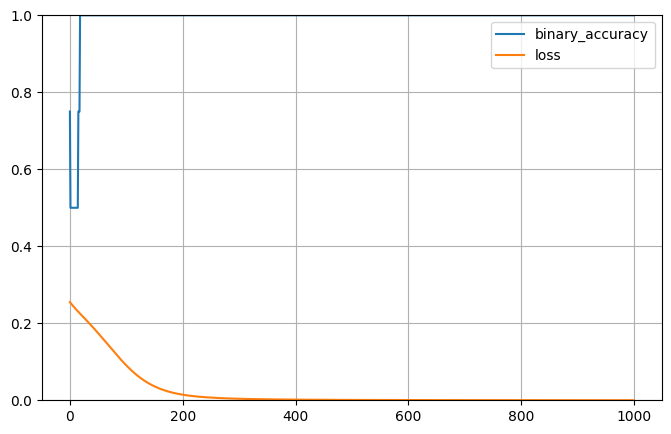

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #el rango vertical
plt.show()

# Evaluación

In [32]:
# evaluamos el modelo
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - binary_accuracy: 1.0000 - loss: 1.6547e-04

compile_metrics: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


# Ejercicio 1.

Implementa una red neuronal que permita realizar operaciones AND

In [ ]:
# PREPARACIÓN DE DATOS
training_data = np.array([[0,0],
                           [0,1],
                           [1,0],
                           [1,1]], "float32")

target_data = np.array([[0],[0],[0],[1]], "float32")


#CONFIGURAR ARQUITECTURA RED NEURONAL
model = Sequential([
    Dense(4,activation='relu', input_shape=(2,), kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid' )
])

#COMPILAR RED NEURONAL
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['binary_accuracy'])

#ENTRENAR ARQUITECTURA RED NEURONAL
history = model.fit(training_data,
                    target_data,
                    epochs=1000, verbose=False) #verbose= Fase para que no salga todo

#EVALUAR ARQUITECTURA RED NEURONAL
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


1/1 [==============================] - 0s 138ms/step - loss: 0.1278 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 51ms/step
[[0.]
 [0.]
 [0.]
 [1.]]


# Ejercicio 2.

Implementa una red neuronal que permita realizar operaciones OR

In [ ]:
# PREPARACIÓN DE DATOS
training_data = np.array([[0,0],
                           [0,1],
                           [1,0],
                           [1,1]], "float32")

target_data = np.array([[0],[1],[1],[1]], "float32")


#CONFIGURAR ARQUITECTURA RED NEURONAL
model = Sequential([
    Dense(16,activation='relu', input_shape=(2,), kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid' )
])

#COMPILAR RED NEURONAL
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['binary_accuracy'])

#ENTRENAR ARQUITECTURA RED NEURONAL
history = model.fit(training_data,
                    target_data,
                    epochs=1000, verbose=False) #verbose= Fase para que no salga todo

#EVALUAR ARQUITECTURA RED NEURONAL
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


1/1 [==============================] - 0s 129ms/step - loss: 0.1332 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 57ms/step
[[0.]
 [1.]
 [1.]
 [1.]]


In [ ]:
print (model.predict(training_data))

1/1 [==============================] - 0s 22ms/step
[[0.3845803 ]
 [0.98092836]
 [0.9765215 ]
 [0.9955803 ]]


# Ejercicio 3.

Implementa una red neuronal que permita realizar operaciones NOT

In [ ]:
# PREPARACIÓN DE DATOS
training_data = np.array([[0],
                          [1]], "float32")

target_data = np.array([[1],[0]], "float32")


#CONFIGURAR ARQUITECTURA RED NEURONAL
model = Sequential([
    Dense(16,activation='relu', input_shape=(1,), kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid' )
])

#COMPILAR RED NEURONAL
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='rmsprop',
              metrics=['binary_accuracy'])

#ENTRENAR ARQUITECTURA RED NEURONAL
history = model.fit(training_data,
                    target_data,
                    epochs=1000, verbose=False) #verbose= Fase para que no salga todo

#EVALUAR ARQUITECTURA RED NEURONAL
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

1/1 [==============================] - 0s 136ms/step - loss: 0.1538 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 53ms/step
[[1.]
 [0.]]


# Ejercicio 4.

Implementa una red neuronal que permita realizar operaciones "A and not(B)"


In [ ]:
# PREPARACIÓN DE DATOS
training_data = np.array([ [0,0],
                           [0,1],
                           [1,0],
                           [1,1]], "float32")

target_data = np.array([[0],[0],[1],[0]], "float32")


#CONFIGURAR ARQUITECTURA RED NEURONAL
model = Sequential([
    Dense(16,activation='relu', input_shape=(2,), kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid' )
])

#COMPILAR RED NEURONAL
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['binary_accuracy'])

#ENTRENAR ARQUITECTURA RED NEURONAL
history = model.fit(training_data,
                    target_data,
                    epochs=1000, verbose=False) #verbose= Fase para que no salga todo

#EVALUAR ARQUITECTURA RED NEURONAL
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


1/1 [==============================] - 0s 137ms/step - loss: 0.0210 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 61ms/step
[[0.]
 [0.]
 [1.]
 [0.]]
